# Clasifying Tweet sentiments


© Explore Data Science Academy

In [4]:
# import relevant libraries
import nltk
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
pd.set_option('display.max_rows', 100)

from nltk.corpus import stopwords
from sklearn.metrics import classification_report

# set plot style
sns.set()

In [5]:
# Loading Data
df = pd.read_csv('C:/Users/Mpilenhle/Documents/EDSA/Classification/Advanced_Classification_Predict-student_data-2780/train.csv')
df_test = pd.read_csv('C:/Users/Mpilenhle/Documents/EDSA/Classification/Advanced_Classification_Predict-student_data-2780/test_with_no_labels.csv')

In [6]:
# looking at the data
df.head(15)

,sentiment,message,tweetid
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221
1,1,It's not like we lack evidence of anthropogeni...,126103
2,2,RT @RawStory: Researchers say we have three ye...,698562
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954
5,1,Worth a read whether you do or don't believe i...,425577
6,1,RT @thenation: Mike Pence doesn’t believe in g...,294933
7,1,RT @makeandmendlife: Six big things we can ALL...,992717
8,1,@AceofSpadesHQ My 8yo nephew is inconsolable. ...,664510
9,1,RT @paigetweedy: no offense… but like… how do ...,260471


In [69]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
import string
import re


#creating a function for removing emojis
def remove_emoji(string):
    emoji_pattern = re.compile("[" 
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)


# punctuation remover function
def remove_punctuation(tweets):
    return ''.join([l for l in tweets if l not in string.punctuation])



def data_cleaner(df, column):
    
    #remmoving the urls
    pattern_url = r'http[s]?://t.co/[A-Za-z0-9]+'
    subs_url = r'url-web'
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)
    
    #remmoving the Re Tweets 
    pattern_url = r'RT\s\@[A-Za-z0-9_]+:'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)
    

    #remmoving the mentions 
    pattern_url = r'@[A-Za-z0-9_]+'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)


    #remmoving the Hashtags 
    pattern_url = r'\#[A-Za-z0-9#?_]+'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)


    #remmoving the remaining https
    pattern_url = r'https:[.*?]+'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)

    # turning all tweets to lower case
    df[column] = df[column].str.lower()
    
    # using apply method to remove the punctuation marks
    df[column] = df[column].apply(remove_punctuation)
    
    # Removing the emojis using the apply method
    df[column] = df[column].apply(remove_emoji)
    
    #remmoving the uknown charecters from words
    pattern_url = r'ã¢â‚¬â¦'
    subs_url = r''
    df[column] = df[column].replace(to_replace = pattern_url, value = subs_url, regex = True)
    
    return df

In [ ]:
# Pick a class size of roughly half the size of the largest size
class_size = 5000

# Downsample classes with more than 5000 observations
pro_downsampled = resample(df[df['sentiment']==1],
                          replace=False, # sample without replacement (no need to duplicate observations)
                          n_samples=class_size, # match number in class_size
                          random_state=27) # reproducible results

# Upsample classes with less than 5000 observations
neutral_upsampled = resample(df[df['sentiment']==0],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in class_size
                          random_state=27) # reproducible results

# Upsample classes with less than 5000 observations
anti_upsampled = resample(df[df['sentiment']==-1],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in class_size
                          random_state=27) # reproducible results

# Upsample classes with less than 5000 observations
news_upsampled = resample(df[df['sentiment']==2],
                          replace=True, # sample with replacement (we need to duplicate observations)
                          n_samples=class_size, # match number in class_size
                          random_state=27) # reproducible results


# Combine sampled classes with majority class
sampled = pd.concat([pro_downsampled, neutral_upsampled, anti_upsampled, news_upsampled], axis = 1)

# Check new class counts
sampled['sentiment'].value_counts()



In [ ]:
# importing necessary libraries
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
 
# X -> features, y -> label
y =  sampled['sentiment']
X =  sampled.drop('sentiment', axis = 1)

# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# extracting features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
V_train_X = vectorizer.fit_transform(X_train)
V_test_X = vectorizer.transform(X_test)


 # training a DescisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(V_train_X, y_train)
dtree_predictions = dtree_model.predict(V_test_X)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, dtree_predictions)


# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(V_train_X, y_train)
svm_predictions = svm_model_linear.predict(V_test_X)
 
# model accuracy for V_test_X 
accuracy = svm_model_linear.score(V_test_X, y_test)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)


# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(V_train_X, y_train)
 
# accuracy on V_test_X
accuracy = knn.score(V_test_X, y_test)
print(accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(V_test_X)
cm = confusion_matrix(y_test, knn_predictions)

# training a Naive classifierBayes 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(V_train_X, y_train)
gnb_predictions = gnb.predict(V_test_X)
 
# accuracy on V_test_X
accuracy = gnb.score(V_test_X, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)

# training a Naive classifierBayes 

from sklearn.linear_model import LogisticRegression
lm_vt = LogisticRegression(multi_class='ovr').fit(V_train_X, y_train)
pred_lr_vt = lm_vt.predict(V_test_X)

# accuracy on V_test_X
accuracy = gnb.score(pred_lr_vt, y_test)
print(accuracy)
 
# creating a confusion matrix
cm = confusion_matrix(y_test, pred_lr_vt)



# results

In [ ]:
print('Classification Report Decision Tree')
print(classification_report(y_test, dtree_predictions))

print('Classification Report SVM')
print(classification_report(y_test, svm_predictions))

print('Classification Report KNN')
print(classification_report(y_test, knn_predictions))

print('Classification Report Naive Bayes')
print(classification_report(y_test, gnb_predictions))

print('Classification Report Linear logistics')
print(classification_report(y_test, pred_lr_vt))

In [18]:
clean_df = data_cleaner(df, 'message')

In [ ]:
http…
ã¢â‚¬â„¢t
ã¢â‚¬â„¢s
ã¢â‚¬â€œ
'httpst…'
…
'ã¢å¾â¡ã¯â¸ï†\x8f
https
ã¢â‚¬â€\x9dwe
ã°å¸ëœâ¬'
ã¢â‚¬â¦
tã¢â‚¬â
ã‚â°f
ã¢â‚¬ëœthereã¢â‚¬â„¢s'
ã¢â‚¬â„¢

In [ ]:
1 potential variables
thinking
tã¢â‚¬â¦
husband
amp
fact
problem
effect
impact
let
evidence
denies
httpsã¢â‚¬â¦
httã¢â‚¬â¦
half
httã¢â‚¬â¦
life
saying
stake
mr


effort	44.0	55.0
major	72.0	20.0	5.0	3.0
role	38.0	38.0



2 potentials
tillerson
expert
used
trump’s

In [19]:
v = clean_df['message']
ms = [i.split() for i in v]
ms

[['polyscimajor',
  'epa',
  'chief',
  'doesnt',
  'think',
  'carbon',
  'dioxide',
  'is',
  'main',
  'cause',
  'of',
  'global',
  'warming',
  'and',
  'wait',
  'what',
  'urlweb',
  'via'],
 ['its',
  'not',
  'like',
  'we',
  'lack',
  'evidence',
  'of',
  'anthropogenic',
  'global',
  'warming'],
 ['researchers',
  'say',
  'we',
  'have',
  'three',
  'years',
  'to',
  'act',
  'on',
  'climate',
  'change',
  'before',
  'it’s',
  'too',
  'late',
  'urlweb',
  'urlweb…'],
 ['wired',
  '2016',
  'was',
  'a',
  'pivotal',
  'year',
  'in',
  'the',
  'war',
  'on',
  'climate',
  'change',
  'urlweb'],
 ['its',
  '2016',
  'and',
  'a',
  'racist',
  'sexist',
  'climate',
  'change',
  'denying',
  'bigot',
  'is',
  'leading',
  'in',
  'the',
  'polls'],
 ['worth',
  'a',
  'read',
  'whether',
  'you',
  'do',
  'or',
  'dont',
  'believe',
  'in',
  'climate',
  'change',
  'urlweb',
  'urlweb'],
 ['mike',
  'pence',
  'doesn’t',
  'believe',
  'in',
  'global',
 

In [10]:
df[df['sentiment'] == -1]

,sentiment,message,tweetid
28,-1,Sally Kohn’s latest evidence of climate change...,355491
46,-1,@realDonaldTrump Carbon Tax is a Globalist ide...,61141
48,-1,RT @SteveSGoddard: We had winds close to 100 M...,719523
56,-1,@MissLizzyNJ lmao 😂 snowflakes ❄️ complaining ...,911385
57,-1,RT @Dawn2334Dawn: This is ONE of Arnold Schwar...,768263
...,...,...,...
15704,-1,RT @dbongino: We're at the point w/the delusio...,890582
15705,-1,RT @joshdcaplan: Al Gore admits Paris Accord w...,380307
15711,-1,RT @JoshNoneYaBiz: Funny the same people who b...,390339
15806,-1,RT @HerberMp: @sness5561_ness Al Gore is a idi...,213863


In [11]:
df.shape

(15819, 3)

In [12]:
df_test.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


In [7]:
df_test.shape

(10546, 2)

In [14]:
#looking at the different types of labels
type_labels = list(df.sentiment.unique())
print(type_labels)

[1, 2, 0, -1]


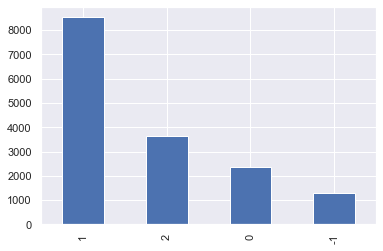

In [15]:
# visualising the data distribution
df['sentiment'].value_counts().plot(kind = 'bar')
plt.show()

# Removing Noise from the data

In [9]:
#remmoving the urls
pattern_url = r'http[s]?://t.co/[A-Za-z0-9]+'
subs_url = r'url-web'
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [37]:
v = df['message']
c = [i for i in v]
for i in range(50):
    print(str(i) +')' + c[i] +'\n')

0)polyscimajor epa chief doesnt think carbon dioxide is main cause of global warming and wait what urlweb via 

1)its not like we lack evidence of anthropogenic global warming

2) researchers say we have three years to act on climate change before it’s too late urlweb urlweb…

3) wired  2016 was a pivotal year in the war on climate change urlweb

4) its 2016 and a racist sexist climate change denying bigot is leading in the polls 

5)worth a read whether you do or dont believe in climate change urlweb urlweb

6) mike pence doesn’t believe in global warming or that smoking causes lung cancer urlweb

7) six big things we can all do today to fight climate change or how to be a climate activistã¢â‚¬â¦ urlweb hã¢â‚¬â¦

8) my 8yo nephew is inconsolable he wants to die of old age like me but will perish in the fiery hellscape of climate change

9) no offense… but like… how do you just not believe… in global warming………

10) shes thinking about how shes going to die because your husband doesnt 

In [21]:
#remmoving the Retweets
pattern_url = r'RT\s\@[A-Za-z0-9_]+:'
subs_url = r''
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [22]:
#remmoving the mentions 
pattern_url = r'@[A-Za-z0-9_]+'
subs_url = r''
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [23]:
#remmoving the Hashtags 
pattern_url = r'\#[A-Za-z0-9#?_]+'
subs_url = r''
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [24]:
#remmoving the remaining https
pattern_url = r'https:[.*?]+'
subs_url = r''
df['message'] = df['message'].replace(to_replace = pattern_url, value = subs_url, regex = True)

In [25]:
# turning all tweets to lower case
df['message'] = df['message'].str.lower()

In [26]:
# punctuation remover function
import string
def remove_punctuation(tweets):
    return ''.join([l for l in tweets if l not in string.punctuation])

In [27]:
# using apply method to remove the punctuation marks
df['message'] = df['message'].apply(remove_punctuation)

In [28]:
#creating a function for removing emojis
import re
def remove_emoji(string):
    emoji_pattern = re.compile("[" 
                u"\U0001F600-\U0001F64F"  # emoticons
                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                u"\U0001F680-\U0001F6FF"  # transport & map symbols
                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                u"\U00002702-\U000027B0"
                u"\U000024C2-\U0001F251"
                u"\U0001f926-\U0001f937"
                u'\U00010000-\U0010ffff'
                u"\u200d"
                u"\u2640-\u2642"
                u"\u2600-\u2B55"
                u"\u23cf"
                u"\u23e9"
                u"\u231a"
                u"\u3030"
                u"\ufe0f"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [29]:
# Removing the emojis using the apply method
df['message'] = df['message'].apply(remove_emoji)

# Tokenizing the tweets

In [ ]:
# importing tokenizing library
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.stem import WordNetLemmatizer
#importing stemmer library
from nltk import SnowballStemmer
#importing stemmer library
from nltk import SnowballStemmer



# lemmatizing function
lemmatizer = WordNetLemmatizer()
def tweet_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words if word.isalpha()]    

#Stemmer function
stemmer = SnowballStemmer('english')
def token_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

def token_lemmatizer_stemmer(df):
    
    #tokenise the tweets and create a column
    tokeniser = TreebankWordTokenizer()
    df['tokens'] = df['message'].apply(tokeniser.tokenize)
     
    #creating a lemma column   
    df['lemma'] = df['tokens'].apply(tweet_lemma, args=(lemmatizer, ))
    
    # find the stem of each word in the original tokens
    df['original_stem'] = df['tokens'].apply(token_stemmer, args=(stemmer, ))
    
    # find the stem of each word in the Lemma tokens
    df['lemma_stem'] = df['lemma'].apply(token_stemmer, args=(stemmer, ))
    
    #removing the stop words
    df['lemma_no_stop_words'] = df['lemma_stem'].apply(remove_stop_words)
    
    #making the original stemmer
    df['original_no_stop_words'] = df['lemma_stem'].apply(remove_stop_words)
    
    return df
    

In [30]:
# importing tokenizing library
from nltk.tokenize import word_tokenize, TreebankWordTokenizer

In [31]:
tokeniser = TreebankWordTokenizer()
df['tokens'] = df['message'].apply(tokeniser.tokenize)

In [32]:
df.head()

,sentiment,message,tweetid,tokens
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr..."
2,2,researchers say we have three years to act on...,698562,"[researchers, say, we, have, three, years, to,..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ..."
4,1,its 2016 and a racist sexist climate change d...,466954,"[its, 2016, and, a, racist, sexist, climate, c..."


# Lemmatizing the tweets

In [33]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

In [34]:
# lemmatizing function
def tweet_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words if word.isalpha()]    

In [35]:
df['lemma'] = df['tokens'].apply(tweet_lemma, args=(lemmatizer, ))

In [36]:
df.head()

,sentiment,message,tweetid,tokens,lemma
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evidence, of, anthro..."
2,2,researchers say we have three years to act on...,698562,"[researchers, say, we, have, three, years, to,...","[researcher, say, we, have, three, year, to, a..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wired, wa, a, pivotal, year, in, the, war, on..."
4,1,its 2016 and a racist sexist climate change d...,466954,"[its, 2016, and, a, racist, sexist, climate, c...","[it, and, a, racist, sexist, climate, change, ..."


# Stemming the Lemma Tokens

In [37]:
#importing stemmer library
from nltk import SnowballStemmer

In [38]:
#Stemmer function
def token_stemmer(words, stemmer):
    return [stemmer.stem(word) for word in words]

In [39]:
# find the stem of each word in the original tokens
stemmer = SnowballStemmer('english')
df['original_stem'] = df['tokens'].apply(token_stemmer, args=(stemmer, ))

In [40]:
# find the stem of each word in the Lemma tokens
stemmer = SnowballStemmer('english')
df['lemma_stem'] = df['lemma'].apply(token_stemmer, args=(stemmer, ))

In [41]:
df.lemma_stem.head()

0    [polyscimajor, epa, chief, doesnt, think, carb...
1    [it, not, like, we, lack, evid, of, anthropoge...
2    [research, say, we, have, three, year, to, act...
3    [wire, wa, a, pivot, year, in, the, war, on, c...
4    [it, and, a, racist, sexist, climat, chang, de...
Name: lemma_stem, dtype: object

# Removing the stop words

In [42]:
def remove_stop_words(tokens):    
    return [t for t in tokens if t not in stopwords.words('english')]

In [43]:
df['lemma_no_stop_words'] = df['lemma_stem'].apply(remove_stop_words)

In [44]:
df['original_no_stop_words'] = df['lemma_stem'].apply(remove_stop_words)

In [45]:
df.head()

,sentiment,message,tweetid,tokens,lemma,original_stem,lemma_stem,lemma_no_stop_words,original_no_stop_words
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb..."
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evidence, of, anthro...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evid, of, anthropoge...","[like, lack, evid, anthropogen, global, warm]","[like, lack, evid, anthropogen, global, warm]"
2,2,researchers say we have three years to act on...,698562,"[researchers, say, we, have, three, years, to,...","[researcher, say, we, have, three, year, to, a...","[research, say, we, have, three, year, to, act...","[research, say, we, have, three, year, to, act...","[research, say, three, year, act, climat, chan...","[research, say, three, year, act, climat, chan..."
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wired, wa, a, pivotal, year, in, the, war, on...","[wire, 2016, was, a, pivot, year, in, the, war...","[wire, wa, a, pivot, year, in, the, war, on, c...","[wire, wa, pivot, year, war, climat, chang, ur...","[wire, wa, pivot, year, war, climat, chang, ur..."
4,1,its 2016 and a racist sexist climate change d...,466954,"[its, 2016, and, a, racist, sexist, climate, c...","[it, and, a, racist, sexist, climate, change, ...","[it, 2016, and, a, racist, sexist, climat, cha...","[it, and, a, racist, sexist, climat, chang, de...","[racist, sexist, climat, chang, deni, bigot, l...","[racist, sexist, climat, chang, deni, bigot, l..."


# Creating Ngrams

In [65]:
'''
The function creates a new data frame with 2 ngrams to test
returns a function with a new column of ngrams

'''
from nltk.util import ngrams
def ngramconvert(df,n=2):
    for item in df.columns:
        df['new_'+item]=df[item].apply(lambda sentence: list(ngrams(sentence.split(), n)))
    return df

In [ ]:
ngram_df = ngramconvert(df[['message']],2)
ngram_df.head()

# Creating a count vector with 2 ngrams not scaled


In [46]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [47]:
# splitting the data
X = df['message']
y = df['sentiment']

In [48]:
# splitting the data
X_train1, X_test1, y_train, y_test = train_test_split(X, y,test_size=0.2,
random_state=53)

In [49]:
count_vectorizer = CountVectorizer(ngram_range=(1, 2))
ngram_count_train1 = count_vectorizer.fit_transform(X_train1.values)
ngram_count_test1 = count_vectorizer.transform(X_test1.values)

In [50]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()
nb_classifier.fit(ngram_count_train1, y_train)

ngram_pred = nb_classifier.predict(ngram_count_test1)
metrics.accuracy_score(y_test, ngram_pred)

0.7139696586599241

In [51]:
print('2 ngram  Model')
print(classification_report(y_test, ngram_pred, target_names= ['-1', '0', '1', '2']))

2 ngram  Model
              precision    recall  f1-score   support

          -1       0.96      0.18      0.30       261
           0       0.80      0.20      0.32       455
           1       0.68      0.93      0.79      1720
           2       0.80      0.71      0.75       728

    accuracy                           0.71      3164
   macro avg       0.81      0.51      0.54      3164
weighted avg       0.75      0.71      0.67      3164



In [52]:
#traing the model with the entire data
yf = df['sentiment']
Xf = df['message']

In [53]:
X_test = df_test['message']

In [ ]:
# Remove stop words first
sampled['token_no_stop_word'] = sampled['tokens'].apply(remove_stop_words)

# Remove stop words first
sampled['stem_no_stop_word'] = sampled['token_no_stop_word'].apply(token_stemmer, args=(stemmer, ))

clean_sentences = [" ".join(i) for i in sampled['stem_no_stop_word']]
sampled['clean_sentences'] = clean_sentences

#tokenise the tweets and create a column
tokeniser = TreebankWordTokenizer()
df['tokens'] = df['message'].apply(tokeniser.tokenize)

In [54]:
count_vectorizerf = CountVectorizer(ngram_range=(1, 2))
count_finalf = count_vectorizerf.fit_transform(Xf)
count_final_test = count_vectorizerf.transform(X_test)

In [55]:
# Import the scaler module
from sklearn import preprocessing

fscaler = preprocessing.MaxAbsScaler()
f_scaled = fscaler.fit_transform(count_finalf)
f_scaled_test = fscaler.transform(count_final_test)

In [56]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

final_classifier2 = MultinomialNB()
final_classifier2.fit(f_scaled, yf)


MultinomialNB()

In [58]:
final_preds = final_classifier2.predict(count_final_test)

In [60]:
final_preds = final_classifier2.predict(count_final_test)
daf=pd.DataFrame(final_preds, columns=['sentiment'])
daf.head()

output = pd.DataFrame({"tweetid":df_test['tweetid']})
submission3 = output.join(daf)        
submission3.to_csv("submission3.csv", index=False)

In [91]:
output = pd.DataFrame({"tweetid":df_test['tweetid']})
submission3 = output.join(daf)        
submission3.to_csv("submission3.csv", index=False)

# using  The cleaned column



In [65]:
clean_sentences = [" ".join(i) for i in df['lemma_no_stop_words']]
df['clean_sentences'] = clean_sentences
df.head()

,sentiment,message,tweetid,tokens,lemma,original_stem,lemma_stem,lemma_no_stop_words,original_no_stop_words,clean_sentences
0,1,polyscimajor epa chief doesnt think carbon dio...,625221,"[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...","[polyscimajor, epa, chief, doesnt, think, carb...",polyscimajor epa chief doesnt think carbon dio...
1,1,its not like we lack evidence of anthropogenic...,126103,"[its, not, like, we, lack, evidence, of, anthr...","[it, not, like, we, lack, evidence, of, anthro...","[it, not, like, we, lack, evid, of, anthropoge...","[it, not, like, we, lack, evid, of, anthropoge...","[like, lack, evid, anthropogen, global, warm]","[like, lack, evid, anthropogen, global, warm]",like lack evid anthropogen global warm
2,2,researchers say we have three years to act on...,698562,"[researchers, say, we, have, three, years, to,...","[researcher, say, we, have, three, year, to, a...","[research, say, we, have, three, year, to, act...","[research, say, we, have, three, year, to, act...","[research, say, three, year, act, climat, chan...","[research, say, three, year, act, climat, chan...",research say three year act climat chang befor...
3,1,wired 2016 was a pivotal year in the war on ...,573736,"[wired, 2016, was, a, pivotal, year, in, the, ...","[wired, wa, a, pivotal, year, in, the, war, on...","[wire, 2016, was, a, pivot, year, in, the, war...","[wire, wa, a, pivot, year, in, the, war, on, c...","[wire, wa, pivot, year, war, climat, chang, ur...","[wire, wa, pivot, year, war, climat, chang, ur...",wire wa pivot year war climat chang urlweb
4,1,its 2016 and a racist sexist climate change d...,466954,"[its, 2016, and, a, racist, sexist, climate, c...","[it, and, a, racist, sexist, climate, change, ...","[it, 2016, and, a, racist, sexist, climat, cha...","[it, and, a, racist, sexist, climat, chang, de...","[racist, sexist, climat, chang, deni, bigot, l...","[racist, sexist, climat, chang, deni, bigot, l...",racist sexist climat chang deni bigot lead poll


In [66]:
x_2 = df['clean_sentences']
y_2 = df['sentiment']

In [67]:
x_2.head()

0    polyscimajor epa chief doesnt think carbon dio...
1               like lack evid anthropogen global warm
2    research say three year act climat chang befor...
3           wire wa pivot year war climat chang urlweb
4      racist sexist climat chang deni bigot lead poll
Name: clean_sentences, dtype: object

In [68]:
# splitting the data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(x_2, y_2,test_size=0.2,
random_state=53)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics

vectorizer = TfidfVectorizer()
vectorised_train_documents = vectorizer.fit_transform(X_train_2)
vectorised_test_documents = vectorizer.transform(X_test_2)

In [ ]:


# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(V_train_X, y_train)
svm_predictions = svm_model_linear.predict(V_test_X)
 
# model accuracy for V_test_X 
accuracy = svm_model_linear.score(V_test_X, y_test)
 
# creating a confusion matrix
cm2 = confusion_matrix(y_test, svm_predictions)


# training a KNN classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(V_train_X, y_train)
 
# accuracy on V_test_X
accuracy = knn.score(V_test_X, y_test)
print(accuracy)
 
# creating a confusion matrix
knn_predictions = knn.predict(V_test_X)
cm3 = confusion_matrix(y_test, knn_predictions)

# training a Naive classifierBayes 
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(V_train_X, y_train)
gnb_predictions = gnb.predict(V_test_X)
 
# accuracy on V_test_X
accuracy = gnb.score(V_test_X, y_test)
print(accuracy)
 
# creating a confusion matrix
cm4 = confusion_matrix(y_test, gnb_predictions)

# training a Naive classifierBayes 
from sklearn.linear_model import LogisticRegression
lm_vt = LogisticRegression(multi_class='ovr').fit(V_train_X, y_train)
pred_lr_vt = lm_vt.predict(V_test_X)

# accuracy on V_test_X
accuracy = gnb.score(pred_lr_vt, y_test)
print(accuracy)
 
# creating a confusion matrix
cm5 = confusion_matrix(y_test, pred_lr_vt)



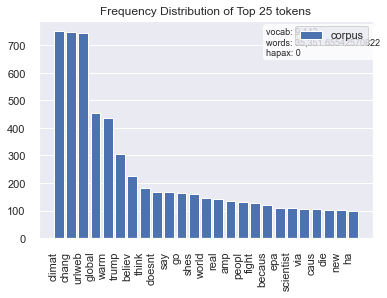

<AxesSubplot:title={'center':'Frequency Distribution of Top 25 tokens'}>

In [66]:
from yellowbrick.text import FreqDistVisualizer
features = vectorizer.get_feature_names()
visualizer = FreqDistVisualizer(features=features, orient='v', n = 25)
visualizer.fit(vectorised_train_documents)
visualizer.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


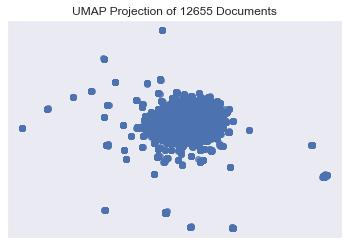

<AxesSubplot:title={'center':'UMAP Projection of 12655 Documents'}>

In [67]:
from yellowbrick.text import UMAPVisualizer

umap = UMAPVisualizer(metric="cosine")
umap.fit(vectorised_train_documents)
umap.show()

In [ ]:
from yellowbrick.regressor import ResidualsPlot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1
)

visualizer = ResidualsPlot(LinearRegression())
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [54]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

nb_classifier = MultinomialNB()
nb_classifier.fit(vectorised_train_documents, y_train_2)

bag_pred = nb_classifier.predict(vectorised_test_documents)
metrics.accuracy_score(y_test_2, bag_pred)

0.649810366624526

In [55]:
print('bag of words')
print(classification_report(y_test_2, bag_pred, target_names= ['-1', '0', '1', '2']))

bag of words
              precision    recall  f1-score   support

          -1       1.00      0.03      0.06       261
           0       0.88      0.08      0.15       455
           1       0.62      0.97      0.76      1720
           2       0.85      0.46      0.59       728

    accuracy                           0.65      3164
   macro avg       0.84      0.39      0.39      3164
weighted avg       0.74      0.65      0.57      3164



In [68]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier


In [70]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(vectorised_train_documents, y_train_2)
clf.score(vectorised_test_documents, y_test_2)

0.6757269279393173

In [71]:
b_pred = clf.predict(vectorised_test_documents)

In [72]:
print(classification_report(y_test_2, b_pred, target_names= ['-1', '0', '1', '2']))

              precision    recall  f1-score   support

          -1       0.78      0.18      0.29       261
           0       0.50      0.28      0.36       455
           1       0.68      0.88      0.77      1720
           2       0.71      0.63      0.67       728

    accuracy                           0.68      3164
   macro avg       0.67      0.49      0.52      3164
weighted avg       0.67      0.68      0.65      3164



In [81]:
count_fnal = 

final_pred = clf.predict(count_final_test)
daf=pd.DataFrame(final_pred, columns=['sentiment'])
daf.head()

output = pd.DataFrame({"tweetid":df_test['tweetid']})
submission4 = output.join(daf)        
submission4.to_csv("submission4.csv", index=False)

NameError: name 'count_final_test' is not defined

In [76]:
# Import the scaler module
from sklearn import preprocessing

fscaler = preprocessing.MaxAbsScaler()
scaled_train = fscaler.fit_transform(vectorised_train_documents)
scaled_test = fscaler.transform(vectorised_test_documents)

In [78]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(vectorised_train_documents, y_train_2)
clf.score(scaled_test, y_test_2)

0.6652970922882427

In [79]:
s_pred = clf.predict(scaled_test)

In [80]:
print(classification_report(y_test_2, s_pred, target_names= ['-1', '0', '1', '2']))

              precision    recall  f1-score   support

          -1       0.70      0.18      0.28       261
           0       0.44      0.32      0.37       455
           1       0.69      0.84      0.76      1720
           2       0.69      0.64      0.66       728

    accuracy                           0.67      3164
   macro avg       0.63      0.49      0.52      3164
weighted avg       0.66      0.67      0.64      3164



In [ ]:
vectorised_train_documents
vectorised_test_documents